## Project Description: Next Word Prediction Using LSTM
#### Project Overview:

This project aims to develop a deep learning model for predicting the next word in a given sequence of words. The model is built using Long Short-Term Memory (LSTM) networks, which are well-suited for sequence prediction tasks. The project includes the following steps:

1- Data Collection: Use the text of The Adventures of Sherlock Holmes by Arthur Conan Doyle as our dataset. This classic detective fiction, with its rich vocabulary and structured narrative, presents a suitable challenge for our language model.

2- Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure uniform input lengths. The sequences are then split into training and testing sets.

3- Model Building: An LSTM model is constructed with an embedding layer, two LSTM layers, and a dense output layer with a softmax activation function to predict the probability of the next word.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to predict the next word accurately.

6- Deployment: A Streamlit web application is developed to allow users to input a sequence of words and get the predicted next word in real-time.

### Inmporting necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
#read dataset
with open('sherlock_holmes.txt', 'r', encoding='utf-8') as file:
    text = file.read()

### Data Preprocessing

    Text Preprocessing: The text is tokenized into words, converted to lowercase, and split into input sequences for training.
    Tokenization: Assigns a unique integer index to each word.
    Sequence Creation: Creates input sequences for training by iterating through lines in the text and constructing n-grams.
    Padding: Ensures uniform length of input sequences by padding with zeros.

In [3]:
#Tokenizer process
tokenizer = Tokenizer()
#fit
tokenizer.fit_on_texts([text])
#assign length of word index
total_words = len(tokenizer.word_index) + 1

In [4]:
total_words

8178

In [5]:
#chek the tokens
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'of': 5,
 'a': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'he': 10,
 'you': 11,
 'was': 12,
 'his': 13,
 'is': 14,
 'my': 15,
 'have': 16,
 'as': 17,
 'had': 18,
 'with': 19,
 'which': 20,
 'at': 21,
 'for': 22,
 'but': 23,
 'me': 24,
 'not': 25,
 'be': 26,
 'we': 27,
 'from': 28,
 'there': 29,
 'said': 30,
 'this': 31,
 'upon': 32,
 'so': 33,
 'holmes': 34,
 'him': 35,
 'her': 36,
 'she': 37,
 "'": 38,
 'very': 39,
 'your': 40,
 'been': 41,
 'all': 42,
 'on': 43,
 'no': 44,
 'what': 45,
 'one': 46,
 'then': 47,
 'were': 48,
 'by': 49,
 'are': 50,
 'an': 51,
 'would': 52,
 'out': 53,
 'when': 54,
 'up': 55,
 'man': 56,
 'could': 57,
 'has': 58,
 'do': 59,
 'into': 60,
 'mr': 61,
 'who': 62,
 'little': 63,
 'will': 64,
 'if': 65,
 'some': 66,
 'now': 67,
 'down': 68,
 'see': 69,
 'should': 70,
 'our': 71,
 'they': 72,
 'or': 73,
 'may': 74,
 'well': 75,
 'am': 76,
 'us': 77,
 'over': 78,
 'more': 79,
 'think': 80,
 'room': 81,
 'know': 82,
 'shall': 83

In [6]:
#declare ngrams
input_sequences = []
#split the sentence from '\n'
for line in text.split('\n'):
    #get tokens
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [7]:
input_sequences

[[2067, 3],
 [4, 132],
 [4, 132, 34],
 [4, 132, 34, 37],
 [4, 132, 34, 37, 14],
 [4, 132, 34, 37, 14, 215],
 [4, 132, 34, 37, 14, 215, 1],
 [4, 132, 34, 37, 14, 215, 1, 210],
 [4, 132, 34, 37, 14, 215, 1, 210, 3],
 [4, 132, 34, 37, 14, 215, 1, 210, 3, 16],
 [4, 132, 34, 37, 14, 215, 1, 210, 3, 16, 1558],
 [4, 132, 34, 37, 14, 215, 1, 210, 3, 16, 1558, 115],
 [4, 132, 34, 37, 14, 215, 1, 210, 3, 16, 1558, 115, 35],
 [3182, 36],
 [3182, 36, 275],
 [3182, 36, 275, 102],
 [3182, 36, 275, 102, 94],
 [3182, 36, 275, 102, 94, 204],
 [3182, 36, 275, 102, 94, 204, 7],
 [3182, 36, 275, 102, 94, 204, 7, 13],
 [3182, 36, 275, 102, 94, 204, 7, 13, 143],
 [3182, 36, 275, 102, 94, 204, 7, 13, 143, 37],
 [3182, 36, 275, 102, 94, 204, 7, 13, 143, 37, 4491],
 [3182, 36, 275, 102, 94, 204, 7, 13, 143, 37, 4491, 2],
 [4492, 1],
 [4492, 1, 263],
 [4492, 1, 263, 5],
 [4492, 1, 263, 5, 36],
 [4492, 1, 263, 5, 36, 4493],
 [4492, 1, 263, 5, 36, 4493, 9],
 [4492, 1, 263, 5, 36, 4493, 9, 12],
 [4492, 1, 263, 5, 

In [8]:
setence_token = input_sequences[3] #[4, 132, 34, 37]
sentence = []
for token in setence_token:
    sentence.append(list((tokenizer.word_index).keys())[list((tokenizer.word_index).values()).index(token)])
print(sentence)

['to', 'sherlock', 'holmes', 'she']


In [9]:
#maximum sentence length
max_sequence_len = max([len(seq) for seq in input_sequences])
# input sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [10]:
input_sequences

array([[   0,    0,    0, ...,    0, 2067,    3],
       [   0,    0,    0, ...,    0,    4,  132],
       [   0,    0,    0, ...,    4,  132,   34],
       ...,
       [   0,    0,    0, ...,   58,  296,   19],
       [   0,    0,    0, ...,  296,   19,  530],
       [   0,    0,    0, ...,   19,  530, 1044]], dtype=int32)

In [11]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [12]:
#convert to array
y = np.array(y)

### Model Building
    LSTM Model
    Embedding Layer: Converts words into dense vector representations.
    LSTM Layers:
    Captures sequential dependencies in text.
    The first LSTM outputs sequences for the next LSTM layer.
    The second LSTM outputs a final feature vector.
    Dropout: Prevents overfitting by deactivating neurons randomly during training.
    Dense Layer: Predicts the next word by outputting probabilities across the vocabulary (softmax activation).

In [13]:
#create model
model = Sequential()
model.add(Embedding(total_words, 100, input_shape=(max_sequence_len-1,)))
model.add(LSTM(150))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

d:\SherlockNext\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 17, 100)        │       817,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8178)           │     1,234,878 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,203,278 (8.40 MB)

 Trainable params: 2,203,278 (8.40 MB)

 Non-trainable params: 0 (0.00 B)

None


 ## Diagram: LSTM Architecture


    Input Sequence (X) → Embedding → LSTM (150 units) → Dropout (20%) → Dense (Softmax) → Predicted Word (Y)


### Model Training

In [14]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

# Train the model
history = model.fit(
    X, y,
    epochs=100
    
)

Epoch 1/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - accuracy: 0.0727 - loss: 6.2585
Epoch 2/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.1155 - loss: 5.6442
Epoch 3/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 50s 17ms/step - accuracy: 0.1387 - loss: 5.3159
Epoch 4/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - accuracy: 0.1557 - loss: 5.0418
Epoch 5/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - accuracy: 0.1681 - loss: 4.8090
Epoch 6/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - accuracy: 0.1808 - loss: 4.5887
Epoch 7/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - accuracy: 0.1956 - loss: 4.3779
Epoch 8/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.2113 - loss: 4.1707
Epoch 9/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 52s 17ms/step - accuracy: 0.2306 - loss: 3.9750
Epoch 10/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - accuracy: 0.2499 - loss: 3.7835
Epoch 11/100
3006/3006 ━━━━━━━━━━━━━━━━━━━━ 53s 18ms/step - accuracy: 0.2700 - loss: 3.61

### Saving the model

In [15]:
#save the model
model.save("next_word_lstm.h5")

import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Visualizing the training result

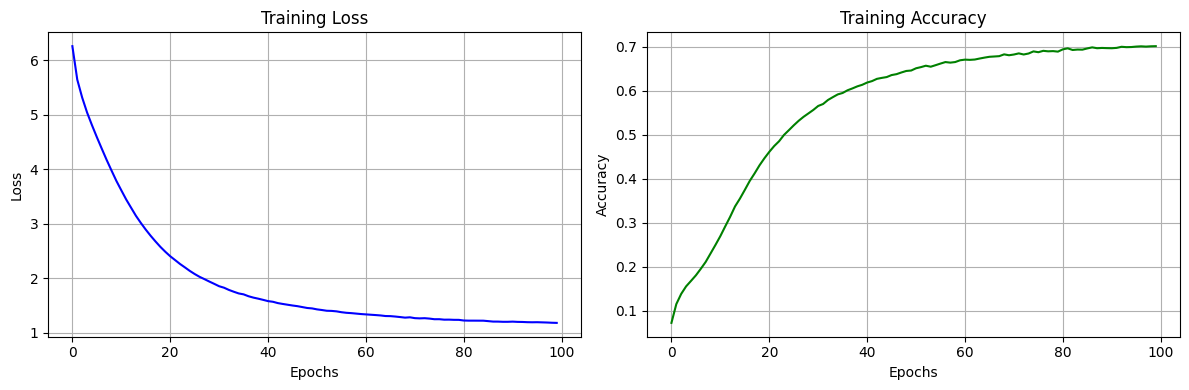

In [22]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot training loss
axs[0].plot(history.history['loss'], color='blue')
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

# Plot training accuracy
axs[1].plot(history.history['accuracy'], color='green')  # Use 'acc' if 'accuracy' doesn't work
axs[1].set_title('Training Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].grid(True)

# Adjust spacing
plt.tight_layout()
plt.show()


In [16]:
seed_text = "I will leave if they"
next_words = 4

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
I will leave if they were likely to be
